In [1]:
import stlearn as st
from pathlib import Path
import scanpy as sc
st.settings.set_figure_params(dpi=300)
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
BASE_PATH = Path("/home/uqxtan9/90days/breast_cancer_10x")
TILE_PATH = Path("/tmp/tiles")
TILE_PATH.mkdir(parents=True, exist_ok=True)
OUT_PATH = Path("/home/uqxtan9/90days/breast_cancer_10x/stlearn_plot/")
OUT_PATH.mkdir(parents=True, exist_ok=True)

In [3]:
BASE_PATH = Path("/home/uqxtan9/90days/breast_cancer_2_10x")
TILE_PATH = Path("/tmp/tiles")
TILE_PATH.mkdir(parents=True, exist_ok=True)
OUT_PATH = Path("/home/uqxtan9/90days/breast_cancer_2_10x/stlearn_plot/")
OUT_PATH.mkdir(parents=True, exist_ok=True)

In [4]:
data = st.Read10X(BASE_PATH)
# pre-processing for gene count table
# st.pp.filter_genes(data,min_cells=3)
data.layers["raw_count"] = data.to_df()
st.pp.normalize_total(data)
st.pp.log1p(data)
# st.pp.scale(data)
data.layers["log"] = data.to_df()
st.em.run_pca(data,n_comps=50)

st.pp.tiling(data, TILE_PATH, crop_size=40)
st.pp.extract_feature(data)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Normalization step is finished in adata.X
Log transformation step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


Tiling image: 100%|██████████ [ time left: 00:00 ]
2022-02-12 23:40:34.615830: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ohpc/pub/mpi/openmpi3-gnu8/3.1.4/lib:/opt/ohpc/pub/compiler/gcc/8.3.0/lib64
2022-02-12 23:40:34.615868: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-02-12 23:40:37.235231: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ohpc/pub/mpi/openmpi3-gnu8/3.1.4/lib:/opt/ohpc/pub/compiler/gcc/8.3.0/lib64
2022-02-12 23:40:37.235280: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-12 23:40:3

The morphology feature is added to adata.obsm['X_morphology']!


# Raw UMI

Adjusting data: 100%|██████████ [ time left: 00:00 ]


The data adjusted by SME is added to adata.obsm['raw_SME_normalized']


/home/uqxtan9/90days/.conda/envs/stlearn/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


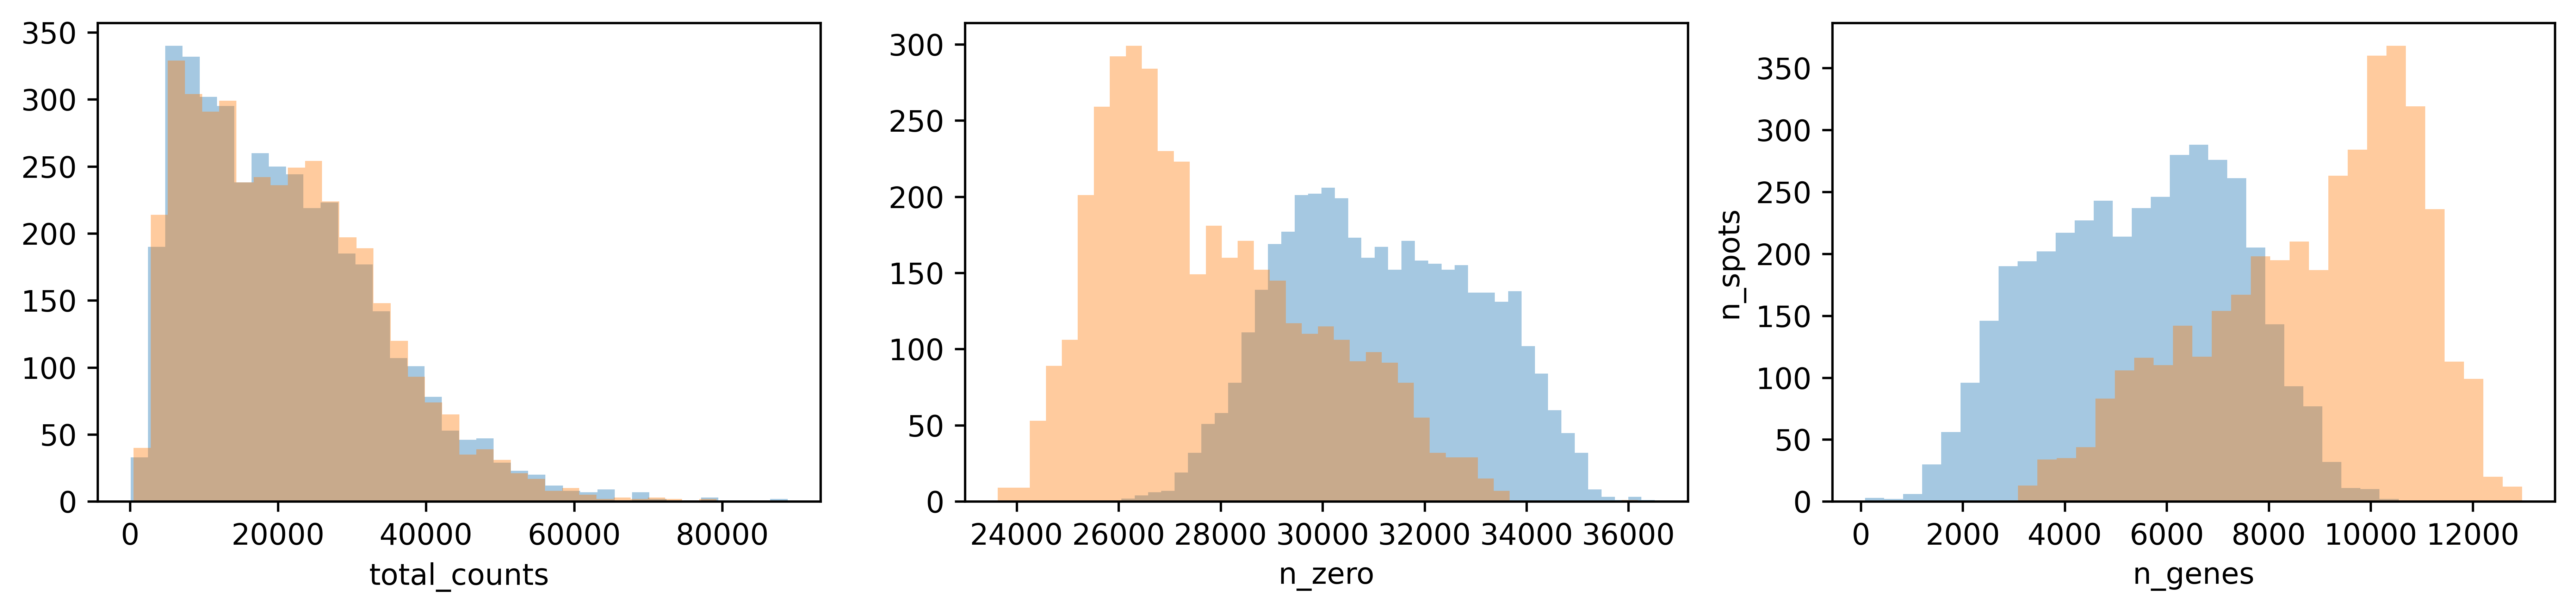

In [5]:
data_SME = data.copy()

data_SME.X = data_SME.layers["raw_count"]
data.X = data.layers["raw_count"]

st.spatial.SME.SME_normalize(data_SME, use_data="raw")
data_SME.X = data_SME.obsm['raw_SME_normalized']

data_SME.obs["total_counts"] = data_SME.to_df().sum(axis=1)
data.obs["total_counts"] = data.to_df().sum(axis=1)

data.obs["n_zero"] = np.sum(data.X ==0, axis=1)
data_SME.obs["n_zero"] = np.sum(data_SME.X ==0, axis=1)

data.obs["n_genes"] = data.to_df().astype(bool).sum(axis=1)
data_SME.obs["n_genes"] = data_SME.to_df().astype(bool).sum(axis=1)

fig, axs = plt.subplots(1, 3, figsize=(15, 3))
sns.distplot(data.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(data_SME.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(
            data.obs["n_zero"],
            kde=False,
            bins=40,
            ax=axs[1])
sns.distplot(
            data_SME.obs["n_zero"],
            kde=False,
            bins=40,
            ax=axs[1])
sns.distplot(data.obs["n_genes"], kde=False, ax=axs[2])
sns.distplot(data_SME.obs["n_genes"], kde=False, ax=axs[2])
plt.ylabel("n_spots")
plt.show()

# Log tranformed

Adjusting data: 100%|██████████ [ time left: 00:00 ]


The data adjusted by SME is added to adata.obsm['raw_SME_normalized']


/home/uqxtan9/90days/.conda/envs/stlearn/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


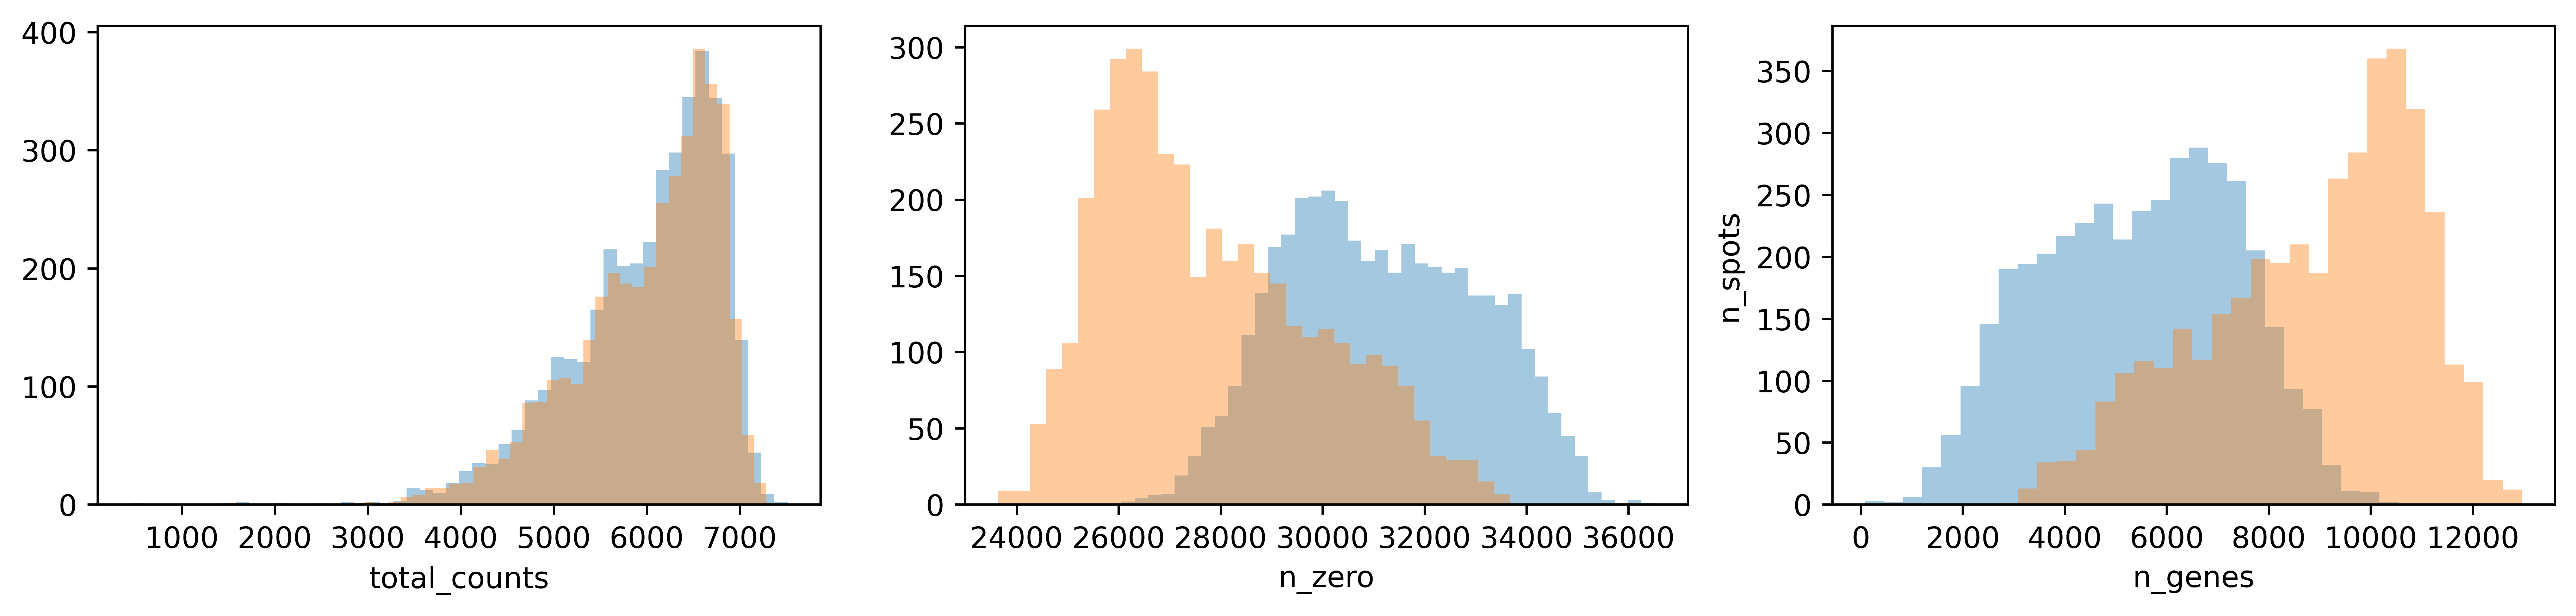

In [6]:
data_SME = data.copy()

data_SME.X = data_SME.layers["log"]
data.X = data.layers["log"]

st.spatial.SME.SME_normalize(data_SME, use_data="raw")
data_SME.X = data_SME.obsm['raw_SME_normalized']

data_SME.obs["total_counts"] = data_SME.to_df().sum(axis=1)
data.obs["total_counts"] = data.to_df().sum(axis=1)

data.obs["n_zero"] = np.sum(data.X ==0, axis=1)
data_SME.obs["n_zero"] = np.sum(data_SME.X ==0, axis=1)

data.obs["n_genes"] = data.to_df().astype(bool).sum(axis=1)
data_SME.obs["n_genes"] = data_SME.to_df().astype(bool).sum(axis=1)

fig, axs = plt.subplots(1, 3, figsize=(15, 3))
sns.distplot(data.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(data_SME.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(
            data.obs["n_zero"],
            kde=False,
            bins=40,
            ax=axs[1])
sns.distplot(
            data_SME.obs["n_zero"],
            kde=False,
            bins=40,
            ax=axs[1])
sns.distplot(data.obs["n_genes"], kde=False, ax=axs[2])
sns.distplot(data_SME.obs["n_genes"], kde=False, ax=axs[2])
plt.ylabel("n_spots")
plt.show()

In [8]:
data.to_df()

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,AP006222.2,AL732372.1,...,AC133551.1,AC136612.1,AC136616.1,AC136616.3,AC136616.2,AC141272.1,AC023491.2,AC007325.1,AC007325.4,AC007325.2
AAACAACGAATAGTTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
AAACAAGTATCTCCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
AAACAATCTACTAGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
AAACACCAATAACTGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.786602,0.0
AAACAGAGCGACTCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
TTGTTTCATTAGTCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.565483,0.0
TTGTTTCCATACAACT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
TTGTTTGTATTACACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
